# Extract Data from yfinance

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
df = yf.download('TSLA', 
                  start='2019-01-01', 
                  end='2024-4-29', 
                  progress=False)
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-22,140.559998,144.440002,138.800003,142.050003,142.050003,107097600
2024-04-23,143.330002,147.259995,141.110001,144.679993,144.679993,124545100
2024-04-24,162.839996,167.970001,157.509995,162.130005,162.130005,181178000
2024-04-25,158.960007,170.880005,158.360001,170.179993,170.179993,126427500
2024-04-26,168.850006,172.119995,166.369995,168.289993,168.289993,109815700


In [3]:
df['Date'] = df.index  # Create a new column 'Date' with the index values
df.reset_index(drop=True, inplace=True) 

In [4]:
close_df = df[['Date', 'Close']]

In [5]:
close_df.head()

,Date,Close
0,2019-01-02,20.674667
1,2019-01-03,20.024000
2,2019-01-04,21.179333
3,2019-01-07,22.330667
4,2019-01-08,22.356667


# Create a Window Function 

In [6]:
def window(df, column_name, k):
    df_copy = df.copy()  
    for i in range(1, k + 1):
        new_column_name = f"{column_name}-{i}"
        df_copy[new_column_name] = df_copy[column_name].shift(i)
    # Swap column names
    column_names = list(df_copy.columns)
    return df_copy.iloc[:, ::-1].drop(range(k))

window_size = 30
close_df = window(close_df, 'Close', window_size)
#close_df = close_df.drop(columns = ['Date'])
close_df.tail(10)


,Close-30,Close-29,Close-28,Close-27,Close-26,Close-25,Close-24,Close-23,Close-22,Close-21,...,Close-8,Close-7,Close-6,Close-5,Close-4,Close-3,Close-2,Close-1,Close,Date
1329,202.639999,188.139999,180.740005,176.539993,178.649994,175.339996,177.770004,177.539993,169.479996,162.500000,...,168.380005,171.110001,164.899994,172.979996,176.880005,171.759995,174.600006,171.050003,161.479996,2024-04-15
1330,188.139999,180.740005,176.539993,178.649994,175.339996,177.770004,177.539993,169.479996,162.500000,163.570007,...,171.110001,164.899994,172.979996,176.880005,171.759995,174.600006,171.050003,161.479996,157.110001,2024-04-16
1331,180.740005,176.539993,178.649994,175.339996,177.770004,177.539993,169.479996,162.500000,163.570007,173.800003,...,164.899994,172.979996,176.880005,171.759995,174.600006,171.050003,161.479996,157.110001,155.449997,2024-04-17
1332,176.539993,178.649994,175.339996,177.770004,177.539993,169.479996,162.500000,163.570007,173.800003,171.320007,...,172.979996,176.880005,171.759995,174.600006,171.050003,161.479996,157.110001,155.449997,149.929993,2024-04-18
1333,178.649994,175.339996,177.770004,177.539993,169.479996,162.500000,163.570007,173.800003,171.320007,175.660004,...,176.880005,171.759995,174.600006,171.050003,161.479996,157.110001,155.449997,149.929993,147.050003,2024-04-19
1334,175.339996,177.770004,177.539993,169.479996,162.500000,163.570007,173.800003,171.320007,175.660004,172.820007,...,171.759995,174.600006,171.050003,161.479996,157.110001,155.449997,149.929993,147.050003,142.050003,2024-04-22
1335,177.770004,177.539993,169.479996,162.500000,163.570007,173.800003,171.320007,175.660004,172.820007,170.830002,...,174.600006,171.050003,161.479996,157.110001,155.449997,149.929993,147.050003,142.050003,144.679993,2024-04-23
1336,177.539993,169.479996,162.500000,163.570007,173.800003,171.320007,175.660004,172.820007,170.830002,172.630005,...,171.050003,161.479996,157.110001,155.449997,149.929993,147.050003,142.050003,144.679993,162.130005,2024-04-24
1337,169.479996,162.500000,163.570007,173.800003,171.320007,175.660004,172.820007,170.830002,172.630005,177.669998,...,161.479996,157.110001,155.449997,149.929993,147.050003,142.050003,144.679993,162.130005,170.179993,2024-04-25
1338,162.500000,163.570007,173.800003,171.320007,175.660004,172.820007,170.830002,172.630005,177.669998,179.830002,...,157.110001,155.449997,149.929993,147.050003,142.050003,144.679993,162.130005,170.179993,168.289993,2024-04-26


In [7]:
#close_df.set_index('Date', inplace=True)
close_df_copy = close_df.copy()
close_df_copy = close_df_copy.drop('Date', axis = 1)

In [8]:
X = close_df_copy.drop(columns = 'Close')
y = close_df_copy['Close'] 

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.to_numpy().reshape(-1, 1))

In [10]:
print(X.shape, y.shape)

(1309, 30) (1309,)


In [11]:
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size

X_train, X_test = X_scaled[:train_size], X_scaled[train_size:]
y_train, y_test = y_scaled[:train_size], y_scaled[train_size:]

In [12]:
print(X_train.shape, X_test.shape)

(1047, 30) (262, 30)


In [13]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adagrad
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

def build_lstm():
    model = Sequential()
    model.add(InputLayer((window_size, 1)))
    model.add(LSTM(50, return_sequences=True))  
    model.add(Dropout(0.2)) 
    model.add(LSTM(50))  
    model.add(Dropout(0.2))
    model.add(Dense(8, activation='relu')) 
    model.add(Dense(1, activation='linear'))  
    return model

#model.summary()

In [14]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def calculate_mape(actual, forecast):
    
    if len(actual) != len(forecast):
        raise ValueError("Length of actual and forecast lists must be the same")
    
    absolute_errors = [abs(actual[i] - forecast[i]) for i in range(len(actual))]
    percentage_errors = [absolute_errors[i] / actual[i] * 100 for i in range(len(actual))]
    mape = sum(percentage_errors) / len(actual)
    
    return mape

In [15]:
import optuna
def objective(trial):
    
    
    learning_rate = trial.suggest_float('learning_rate', 0.0098, 0.012)
    #batch_size = trial.suggest_categorical('batch_size', [16,32])
    
    print('Learning Rate', learning_rate)
    #print('batch_size', batch_size)
    
    model = build_lstm()
    
    checkpoint = ModelCheckpoint(f'tesla_model_lstm/model_tesla_window_30_{learning_rate}.h5', save_best_only=True)
    model.compile(loss='mean_squared_error',optimizer= Adam(learning_rate=learning_rate))
    model.fit(X_train, y_train, batch_size=32,epochs=400, validation_data=(X_test, y_test), verbose=1, callbacks=[checkpoint])

    model_load = load_model(f'tesla_model_lstm/model_tesla_window_30_{learning_rate}.h5')
    
    test_predictions = model_load.predict(X_test).flatten()
    test_predictions = np.expand_dims(test_predictions, axis=1)
    test_predictions = scaler_y.inverse_transform(test_predictions)
    
    #test_y = np.expand_dims(y_test, axis=1)
    y_test1 = scaler_y.inverse_transform(y_test)
        
    y_TEST = y_test1
    y_PRED = test_predictions
        
    #mae = mean_absolute_error(y_TEST[-256:], y_PRED[-256:])
    #RMSE = rmse(y_TEST[-256:], y_PRED[-256:])
    MAPE = calculate_mape(y_TEST[-256:], y_PRED[-256:])
    #r2 = r2_score(y_TEST[-256:], y_PRED[-256:])
    
    return MAPE

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials = 20)

trial = study.best_trial
print(trial)

[I 2024-05-14 18:37:27,675] A new study created in memory with name: no-name-011c4f1b-ef83-4f3e-866d-1838c10098be


Learning Rate 0.011242854228983207
Epoch 1/400
33/33 [==============================] - 8s 43ms/step - loss: 0.0388 - val_loss: 0.0032
Epoch 2/400
33/33 [==============================] - 1s 16ms/step - loss: 0.0048 - val_loss: 0.0013
Epoch 3/400
33/33 [==============================] - 0s 15ms/step - loss: 0.0029 - val_loss: 0.0010
Epoch 4/400
33/33 [==============================] - 0s 14ms/step - loss: 0.0029 - val_loss: 0.0015
Epoch 5/400
33/33 [==============================] - 1s 15ms/step - loss: 0.0024 - val_loss: 8.4558e-04
Epoch 6/400
33/33 [==============================] - 0s 13ms/step - loss: 0.0024 - val_loss: 0.0012
Epoch 7/400
33/33 [==============================] - 0s 14ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 8/400
33/33 [==============================] - 0s 15ms/step - loss: 0.0019 - val_loss: 0.0021
Epoch 9/400
33/33 [==============================] - 1s 16ms/step - loss: 0.0022 - val_loss: 7.7956e-04
Epoch 10/400
33/33 [==============================] - 0s 

[I 2024-05-14 18:40:49,495] Trial 0 finished with value: 2.3323790487353806 and parameters: {'learning_rate': 0.011242854228983207}. Best is trial 0 with value: 2.3323790487353806.


Learning Rate 0.011128900746503852
Epoch 1/400
33/33 [==============================] - 4s 38ms/step - loss: 0.0335 - val_loss: 0.0028
Epoch 2/400
33/33 [==============================] - 1s 16ms/step - loss: 0.0034 - val_loss: 0.0018
Epoch 3/400
33/33 [==============================] - 1s 15ms/step - loss: 0.0028 - val_loss: 9.5334e-04
Epoch 4/400
33/33 [==============================] - 0s 14ms/step - loss: 0.0024 - val_loss: 0.0011
Epoch 5/400
33/33 [==============================] - 0s 14ms/step - loss: 0.0028 - val_loss: 0.0013
Epoch 6/400
33/33 [==============================] - 1s 16ms/step - loss: 0.0018 - val_loss: 7.9199e-04
Epoch 7/400
33/33 [==============================] - 0s 15ms/step - loss: 0.0018 - val_loss: 9.8574e-04
Epoch 8/400
33/33 [==============================] - 1s 15ms/step - loss: 0.0021 - val_loss: 9.0921e-04
Epoch 9/400
33/33 [==============================] - 0s 15ms/step - loss: 0.0020 - val_loss: 6.7436e-04
Epoch 10/400
33/33 [=========================

[I 2024-05-14 18:44:00,026] Trial 1 finished with value: 2.318123495110576 and parameters: {'learning_rate': 0.011128900746503852}. Best is trial 1 with value: 2.318123495110576.


Learning Rate 0.011435192726768647
Epoch 1/400
33/33 [==============================] - 4s 37ms/step - loss: 0.0465 - val_loss: 0.0031
Epoch 2/400
33/33 [==============================] - 0s 15ms/step - loss: 0.0047 - val_loss: 0.0046
Epoch 3/400
33/33 [==============================] - 0s 15ms/step - loss: 0.0034 - val_loss: 0.0021
Epoch 4/400
33/33 [==============================] - 0s 14ms/step - loss: 0.0030 - val_loss: 9.7160e-04
Epoch 5/400
33/33 [==============================] - 0s 14ms/step - loss: 0.0025 - val_loss: 8.7001e-04
Epoch 6/400
33/33 [==============================] - 0s 13ms/step - loss: 0.0023 - val_loss: 9.0334e-04
Epoch 7/400
33/33 [==============================] - 0s 14ms/step - loss: 0.0019 - val_loss: 7.8621e-04
Epoch 8/400
33/33 [==============================] - 0s 12ms/step - loss: 0.0022 - val_loss: 0.0029
Epoch 9/400
33/33 [==============================] - 0s 13ms/step - loss: 0.0019 - val_loss: 7.0448e-04
Epoch 10/400
33/33 [=========================

[I 2024-05-14 18:47:14,721] Trial 2 finished with value: 2.3203225146770956 and parameters: {'learning_rate': 0.011435192726768647}. Best is trial 1 with value: 2.318123495110576.


Learning Rate 0.010669604249574577
Epoch 1/400
33/33 [==============================] - 4s 35ms/step - loss: 0.0268 - val_loss: 0.0020
Epoch 2/400
33/33 [==============================] - 0s 14ms/step - loss: 0.0042 - val_loss: 0.0016
Epoch 3/400
33/33 [==============================] - 0s 14ms/step - loss: 0.0032 - val_loss: 0.0013
Epoch 4/400
33/33 [==============================] - 0s 13ms/step - loss: 0.0027 - val_loss: 0.0015
Epoch 5/400
33/33 [==============================] - 0s 13ms/step - loss: 0.0025 - val_loss: 0.0022
Epoch 6/400
33/33 [==============================] - 0s 14ms/step - loss: 0.0026 - val_loss: 8.2233e-04
Epoch 7/400
33/33 [==============================] - 0s 13ms/step - loss: 0.0022 - val_loss: 0.0011
Epoch 8/400
33/33 [==============================] - 0s 12ms/step - loss: 0.0020 - val_loss: 0.0011
Epoch 9/400
33/33 [==============================] - 0s 14ms/step - loss: 0.0023 - val_loss: 7.2229e-04
Epoch 10/400
33/33 [==============================] - 0s 

[I 2024-05-14 18:50:19,027] Trial 3 finished with value: 2.285780459007876 and parameters: {'learning_rate': 0.010669604249574577}. Best is trial 3 with value: 2.285780459007876.


Learning Rate 0.010601042974740377
Epoch 1/400
33/33 [==============================] - 4s 38ms/step - loss: 0.0438 - val_loss: 0.0035
Epoch 2/400
33/33 [==============================] - 0s 14ms/step - loss: 0.0049 - val_loss: 0.0055
Epoch 3/400
33/33 [==============================] - 1s 16ms/step - loss: 0.0034 - val_loss: 0.0016
Epoch 4/400
33/33 [==============================] - 1s 15ms/step - loss: 0.0026 - val_loss: 0.0013
Epoch 5/400
33/33 [==============================] - 0s 14ms/step - loss: 0.0025 - val_loss: 0.0032
Epoch 6/400
33/33 [==============================] - 0s 14ms/step - loss: 0.0023 - val_loss: 0.0025
Epoch 7/400
33/33 [==============================] - 0s 15ms/step - loss: 0.0023 - val_loss: 7.9124e-04
Epoch 8/400
33/33 [==============================] - 0s 14ms/step - loss: 0.0018 - val_loss: 0.0015
Epoch 9/400
33/33 [==============================] - 0s 15ms/step - loss: 0.0019 - val_loss: 0.0011
Epoch 10/400
33/33 [==============================] - 0s 14ms

[I 2024-05-14 18:53:28,553] Trial 4 finished with value: 2.3573810741320074 and parameters: {'learning_rate': 0.010601042974740377}. Best is trial 3 with value: 2.285780459007876.


Learning Rate 0.01106210668367599
Epoch 1/400
33/33 [==============================] - 4s 37ms/step - loss: 0.0205 - val_loss: 0.0036
Epoch 2/400
33/33 [==============================] - 0s 14ms/step - loss: 0.0034 - val_loss: 0.0042
Epoch 3/400
33/33 [==============================] - 0s 15ms/step - loss: 0.0032 - val_loss: 0.0011
Epoch 4/400
33/33 [==============================] - 0s 15ms/step - loss: 0.0033 - val_loss: 7.9808e-04
Epoch 5/400
33/33 [==============================] - 0s 14ms/step - loss: 0.0024 - val_loss: 8.0393e-04
Epoch 6/400
33/33 [==============================] - 0s 14ms/step - loss: 0.0024 - val_loss: 0.0031
Epoch 7/400
33/33 [==============================] - 0s 14ms/step - loss: 0.0023 - val_loss: 0.0016
Epoch 8/400
33/33 [==============================] - 0s 13ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 9/400
33/33 [==============================] - 0s 14ms/step - loss: 0.0018 - val_loss: 8.1611e-04
Epoch 10/400
33/33 [==============================] - 

[I 2024-05-14 18:56:41,698] Trial 5 finished with value: 2.268581564548703 and parameters: {'learning_rate': 0.01106210668367599}. Best is trial 5 with value: 2.268581564548703.


Learning Rate 0.011670459615396277
Epoch 1/400
33/33 [==============================] - 4s 38ms/step - loss: 0.0946 - val_loss: 0.0041
Epoch 2/400
33/33 [==============================] - 1s 16ms/step - loss: 0.0060 - val_loss: 0.0017
Epoch 3/400
33/33 [==============================] - 1s 16ms/step - loss: 0.0043 - val_loss: 0.0014
Epoch 4/400
33/33 [==============================] - 1s 16ms/step - loss: 0.0038 - val_loss: 0.0034
Epoch 5/400
33/33 [==============================] - 0s 15ms/step - loss: 0.0033 - val_loss: 0.0012
Epoch 6/400
33/33 [==============================] - 0s 15ms/step - loss: 0.0028 - val_loss: 0.0015
Epoch 7/400
33/33 [==============================] - 1s 16ms/step - loss: 0.0028 - val_loss: 9.5135e-04
Epoch 8/400
33/33 [==============================] - 0s 15ms/step - loss: 0.0025 - val_loss: 8.8832e-04
Epoch 9/400
33/33 [==============================] - 1s 16ms/step - loss: 0.0022 - val_loss: 0.0011
Epoch 10/400
33/33 [==============================] - 0s 

[I 2024-05-14 18:59:57,044] Trial 6 finished with value: 2.4651654566615955 and parameters: {'learning_rate': 0.011670459615396277}. Best is trial 5 with value: 2.268581564548703.


Learning Rate 0.010160238946917801
Epoch 1/400
33/33 [==============================] - 4s 37ms/step - loss: 0.0400 - val_loss: 0.0028
Epoch 2/400
33/33 [==============================] - 0s 14ms/step - loss: 0.0052 - val_loss: 0.0031
Epoch 3/400
33/33 [==============================] - 1s 16ms/step - loss: 0.0031 - val_loss: 0.0012
Epoch 4/400
33/33 [==============================] - 0s 15ms/step - loss: 0.0028 - val_loss: 0.0012
Epoch 5/400
33/33 [==============================] - 1s 16ms/step - loss: 0.0022 - val_loss: 0.0011
Epoch 6/400
33/33 [==============================] - 0s 15ms/step - loss: 0.0024 - val_loss: 0.0014
Epoch 7/400
33/33 [==============================] - 1s 16ms/step - loss: 0.0027 - val_loss: 0.0021
Epoch 8/400
33/33 [==============================] - 0s 14ms/step - loss: 0.0023 - val_loss: 8.3837e-04
Epoch 9/400
33/33 [==============================] - 1s 17ms/step - loss: 0.0020 - val_loss: 0.0015
Epoch 10/400
33/33 [==============================] - 1s 16ms

[I 2024-05-14 19:03:17,871] Trial 7 finished with value: 2.316146865856554 and parameters: {'learning_rate': 0.010160238946917801}. Best is trial 5 with value: 2.268581564548703.


Learning Rate 0.01014168088059389
Epoch 1/400
33/33 [==============================] - 4s 37ms/step - loss: 0.0336 - val_loss: 0.0024
Epoch 2/400
33/33 [==============================] - 1s 17ms/step - loss: 0.0041 - val_loss: 0.0011
Epoch 3/400
33/33 [==============================] - 1s 16ms/step - loss: 0.0031 - val_loss: 0.0014
Epoch 4/400
33/33 [==============================] - 1s 16ms/step - loss: 0.0032 - val_loss: 0.0035
Epoch 5/400
33/33 [==============================] - 0s 13ms/step - loss: 0.0023 - val_loss: 0.0034
Epoch 6/400
33/33 [==============================] - 0s 15ms/step - loss: 0.0025 - val_loss: 0.0011
Epoch 7/400
33/33 [==============================] - 1s 16ms/step - loss: 0.0025 - val_loss: 0.0018
Epoch 8/400
33/33 [==============================] - 0s 13ms/step - loss: 0.0023 - val_loss: 0.0011
Epoch 9/400
33/33 [==============================] - 0s 15ms/step - loss: 0.0021 - val_loss: 0.0014
Epoch 10/400
33/33 [==============================] - 0s 15ms/step

[I 2024-05-14 19:06:35,735] Trial 8 finished with value: 2.3222758603831237 and parameters: {'learning_rate': 0.01014168088059389}. Best is trial 5 with value: 2.268581564548703.


Learning Rate 0.010489228310106364
Epoch 1/400
33/33 [==============================] - 4s 41ms/step - loss: 0.0318 - val_loss: 0.0016
Epoch 2/400
33/33 [==============================] - 0s 13ms/step - loss: 0.0047 - val_loss: 0.0024
Epoch 3/400
33/33 [==============================] - 1s 16ms/step - loss: 0.0032 - val_loss: 0.0011
Epoch 4/400
33/33 [==============================] - 0s 15ms/step - loss: 0.0024 - val_loss: 9.7417e-04
Epoch 5/400
33/33 [==============================] - 0s 14ms/step - loss: 0.0024 - val_loss: 0.0011
Epoch 6/400
33/33 [==============================] - 0s 14ms/step - loss: 0.0025 - val_loss: 0.0012
Epoch 7/400
33/33 [==============================] - 1s 16ms/step - loss: 0.0021 - val_loss: 0.0017
Epoch 8/400
33/33 [==============================] - 1s 15ms/step - loss: 0.0020 - val_loss: 7.1797e-04
Epoch 9/400
33/33 [==============================] - 0s 13ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 10/400
33/33 [==============================] - 0s 

[I 2024-05-14 19:09:54,187] Trial 9 finished with value: 2.2783707913403446 and parameters: {'learning_rate': 0.010489228310106364}. Best is trial 5 with value: 2.268581564548703.


Learning Rate 0.011975509707651958
Epoch 1/400
33/33 [==============================] - 4s 37ms/step - loss: 0.0553 - val_loss: 0.0021
Epoch 2/400
33/33 [==============================] - 0s 15ms/step - loss: 0.0042 - val_loss: 0.0021
Epoch 3/400
33/33 [==============================] - 0s 14ms/step - loss: 0.0032 - val_loss: 0.0046
Epoch 4/400
33/33 [==============================] - 0s 14ms/step - loss: 0.0029 - val_loss: 0.0027
Epoch 5/400
33/33 [==============================] - 0s 15ms/step - loss: 0.0028 - val_loss: 9.6417e-04
Epoch 6/400
33/33 [==============================] - 0s 13ms/step - loss: 0.0025 - val_loss: 0.0015
Epoch 7/400
33/33 [==============================] - 0s 15ms/step - loss: 0.0027 - val_loss: 9.1708e-04
Epoch 8/400
33/33 [==============================] - 0s 14ms/step - loss: 0.0026 - val_loss: 0.0025
Epoch 9/400
33/33 [==============================] - 0s 15ms/step - loss: 0.0022 - val_loss: 8.0864e-04
Epoch 10/400
33/33 [==============================] -

[I 2024-05-14 19:13:13,453] Trial 10 finished with value: 2.2895218215253945 and parameters: {'learning_rate': 0.011975509707651958}. Best is trial 5 with value: 2.268581564548703.


Learning Rate 0.010735139394591127
Epoch 1/400
33/33 [==============================] - 4s 38ms/step - loss: 0.0381 - val_loss: 0.0013
Epoch 2/400
33/33 [==============================] - 1s 15ms/step - loss: 0.0033 - val_loss: 0.0016
Epoch 3/400
33/33 [==============================] - 1s 16ms/step - loss: 0.0027 - val_loss: 0.0013
Epoch 4/400
33/33 [==============================] - 1s 17ms/step - loss: 0.0026 - val_loss: 0.0010
Epoch 5/400
33/33 [==============================] - 0s 15ms/step - loss: 0.0022 - val_loss: 0.0016
Epoch 6/400
33/33 [==============================] - 1s 16ms/step - loss: 0.0022 - val_loss: 8.6973e-04
Epoch 7/400
33/33 [==============================] - 1s 16ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 8/400
33/33 [==============================] - 1s 16ms/step - loss: 0.0019 - val_loss: 0.0013
Epoch 9/400
33/33 [==============================] - 0s 15ms/step - loss: 0.0017 - val_loss: 0.0013
Epoch 10/400
33/33 [==============================] - 1s 16ms

[I 2024-05-14 19:16:34,735] Trial 11 finished with value: 2.2807246637420917 and parameters: {'learning_rate': 0.010735139394591127}. Best is trial 5 with value: 2.268581564548703.


Learning Rate 0.009872519464644843
Epoch 1/400
33/33 [==============================] - 4s 38ms/step - loss: 0.0427 - val_loss: 0.0041
Epoch 2/400
33/33 [==============================] - 0s 15ms/step - loss: 0.0050 - val_loss: 0.0021
Epoch 3/400
33/33 [==============================] - 0s 14ms/step - loss: 0.0045 - val_loss: 0.0027
Epoch 4/400
33/33 [==============================] - 1s 16ms/step - loss: 0.0027 - val_loss: 9.5604e-04
Epoch 5/400
33/33 [==============================] - 0s 14ms/step - loss: 0.0025 - val_loss: 0.0016
Epoch 6/400
33/33 [==============================] - 0s 14ms/step - loss: 0.0021 - val_loss: 0.0012
Epoch 7/400
33/33 [==============================] - 1s 15ms/step - loss: 0.0027 - val_loss: 0.0013
Epoch 8/400
33/33 [==============================] - 1s 15ms/step - loss: 0.0020 - val_loss: 9.0300e-04
Epoch 9/400
33/33 [==============================] - 0s 14ms/step - loss: 0.0020 - val_loss: 0.0040
Epoch 10/400
33/33 [==============================] - 0s 

[I 2024-05-14 19:19:43,575] Trial 12 finished with value: 2.3140989122470668 and parameters: {'learning_rate': 0.009872519464644843}. Best is trial 5 with value: 2.268581564548703.


Learning Rate 0.010407419281699032
Epoch 1/400
33/33 [==============================] - 4s 37ms/step - loss: 0.0364 - val_loss: 0.0017
Epoch 2/400
33/33 [==============================] - 0s 15ms/step - loss: 0.0043 - val_loss: 0.0012
Epoch 3/400
33/33 [==============================] - 0s 15ms/step - loss: 0.0032 - val_loss: 0.0010
Epoch 4/400
33/33 [==============================] - 0s 14ms/step - loss: 0.0029 - val_loss: 0.0012
Epoch 5/400
33/33 [==============================] - 0s 14ms/step - loss: 0.0023 - val_loss: 0.0012
Epoch 6/400
33/33 [==============================] - 0s 14ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 7/400
33/33 [==============================] - 0s 15ms/step - loss: 0.0021 - val_loss: 7.4820e-04
Epoch 8/400
33/33 [==============================] - 0s 15ms/step - loss: 0.0019 - val_loss: 7.7683e-04
Epoch 9/400
33/33 [==============================] - 1s 16ms/step - loss: 0.0019 - val_loss: 7.1039e-04
Epoch 10/400
33/33 [==============================] -

[I 2024-05-14 19:22:56,648] Trial 13 finished with value: 2.258706175997863 and parameters: {'learning_rate': 0.010407419281699032}. Best is trial 13 with value: 2.258706175997863.


Learning Rate 0.01098316745876921
Epoch 1/400
33/33 [==============================] - 4s 35ms/step - loss: 0.0266 - val_loss: 0.0024
Epoch 2/400
33/33 [==============================] - 0s 14ms/step - loss: 0.0034 - val_loss: 0.0011
Epoch 3/400
33/33 [==============================] - 0s 13ms/step - loss: 0.0027 - val_loss: 9.8824e-04
Epoch 4/400
33/33 [==============================] - 0s 13ms/step - loss: 0.0024 - val_loss: 0.0016
Epoch 5/400
33/33 [==============================] - 0s 13ms/step - loss: 0.0021 - val_loss: 0.0015
Epoch 6/400
33/33 [==============================] - 0s 13ms/step - loss: 0.0022 - val_loss: 0.0015
Epoch 7/400
33/33 [==============================] - 0s 12ms/step - loss: 0.0021 - val_loss: 0.0012
Epoch 8/400
33/33 [==============================] - 0s 13ms/step - loss: 0.0018 - val_loss: 7.4146e-04
Epoch 9/400
33/33 [==============================] - 0s 13ms/step - loss: 0.0015 - val_loss: 7.6212e-04
Epoch 10/400
33/33 [==============================] - 

[I 2024-05-14 19:26:05,475] Trial 14 finished with value: 2.2894122949790536 and parameters: {'learning_rate': 0.01098316745876921}. Best is trial 13 with value: 2.258706175997863.


Learning Rate 0.010333995175469205
Epoch 1/400
33/33 [==============================] - 4s 39ms/step - loss: 0.0306 - val_loss: 0.0014
Epoch 2/400
33/33 [==============================] - 1s 17ms/step - loss: 0.0035 - val_loss: 0.0014
Epoch 3/400
33/33 [==============================] - 1s 16ms/step - loss: 0.0028 - val_loss: 8.7451e-04
Epoch 4/400
33/33 [==============================] - 1s 15ms/step - loss: 0.0024 - val_loss: 0.0017
Epoch 5/400
33/33 [==============================] - 1s 16ms/step - loss: 0.0028 - val_loss: 7.6719e-04
Epoch 6/400
33/33 [==============================] - 1s 16ms/step - loss: 0.0020 - val_loss: 8.2384e-04
Epoch 7/400
33/33 [==============================] - 1s 16ms/step - loss: 0.0021 - val_loss: 7.0952e-04
Epoch 8/400
33/33 [==============================] - 0s 14ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 9/400
33/33 [==============================] - 0s 13ms/step - loss: 0.0023 - val_loss: 0.0013
Epoch 10/400
33/33 [=============================

[I 2024-05-14 19:29:16,020] Trial 15 finished with value: 2.395232405584449 and parameters: {'learning_rate': 0.010333995175469205}. Best is trial 13 with value: 2.258706175997863.


Learning Rate 0.010897703819767181
Epoch 1/400
33/33 [==============================] - 4s 35ms/step - loss: 0.0177 - val_loss: 0.0025
Epoch 2/400
33/33 [==============================] - 0s 14ms/step - loss: 0.0037 - val_loss: 0.0023
Epoch 3/400
33/33 [==============================] - 0s 14ms/step - loss: 0.0024 - val_loss: 9.3096e-04
Epoch 4/400
33/33 [==============================] - 0s 12ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 5/400
33/33 [==============================] - 0s 13ms/step - loss: 0.0020 - val_loss: 8.4942e-04
Epoch 6/400
33/33 [==============================] - 0s 13ms/step - loss: 0.0019 - val_loss: 6.9100e-04
Epoch 7/400
33/33 [==============================] - 0s 11ms/step - loss: 0.0025 - val_loss: 0.0014
Epoch 8/400
33/33 [==============================] - 0s 13ms/step - loss: 0.0016 - val_loss: 6.3184e-04
Epoch 9/400
33/33 [==============================] - 0s 12ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 10/400
33/33 [=============================

[I 2024-05-14 19:32:21,502] Trial 16 finished with value: 2.2681969147699457 and parameters: {'learning_rate': 0.010897703819767181}. Best is trial 13 with value: 2.258706175997863.


Learning Rate 0.01083800150619141
Epoch 1/400
33/33 [==============================] - 4s 37ms/step - loss: 0.0233 - val_loss: 0.0013
Epoch 2/400
33/33 [==============================] - 0s 13ms/step - loss: 0.0055 - val_loss: 0.0036
Epoch 3/400
33/33 [==============================] - 0s 14ms/step - loss: 0.0040 - val_loss: 0.0015
Epoch 4/400
33/33 [==============================] - 0s 15ms/step - loss: 0.0030 - val_loss: 0.0035
Epoch 5/400
33/33 [==============================] - 1s 15ms/step - loss: 0.0027 - val_loss: 8.2771e-04
Epoch 6/400
33/33 [==============================] - 0s 14ms/step - loss: 0.0023 - val_loss: 8.9180e-04
Epoch 7/400
33/33 [==============================] - 0s 15ms/step - loss: 0.0020 - val_loss: 7.7440e-04
Epoch 8/400
33/33 [==============================] - 0s 14ms/step - loss: 0.0022 - val_loss: 7.7641e-04
Epoch 9/400
33/33 [==============================] - 0s 14ms/step - loss: 0.0018 - val_loss: 0.0016
Epoch 10/400
33/33 [==============================

[I 2024-05-14 19:35:32,492] Trial 17 finished with value: 2.311971072986952 and parameters: {'learning_rate': 0.01083800150619141}. Best is trial 13 with value: 2.258706175997863.


Learning Rate 0.009896872019635858
Epoch 1/400
33/33 [==============================] - 4s 43ms/step - loss: 0.0232 - val_loss: 0.0021
Epoch 2/400
33/33 [==============================] - 0s 15ms/step - loss: 0.0031 - val_loss: 9.3309e-04
Epoch 3/400
33/33 [==============================] - 0s 14ms/step - loss: 0.0023 - val_loss: 8.2571e-04
Epoch 4/400
33/33 [==============================] - 0s 13ms/step - loss: 0.0023 - val_loss: 0.0016
Epoch 5/400
33/33 [==============================] - 0s 14ms/step - loss: 0.0020 - val_loss: 0.0012
Epoch 6/400
33/33 [==============================] - 0s 14ms/step - loss: 0.0019 - val_loss: 6.9486e-04
Epoch 7/400
33/33 [==============================] - 0s 14ms/step - loss: 0.0017 - val_loss: 6.3992e-04
Epoch 8/400
33/33 [==============================] - 0s 14ms/step - loss: 0.0016 - val_loss: 6.3014e-04
Epoch 9/400
33/33 [==============================] - 0s 13ms/step - loss: 0.0019 - val_loss: 0.0016
Epoch 10/400
33/33 [=========================

[I 2024-05-14 19:38:37,166] Trial 18 finished with value: 2.275390250502194 and parameters: {'learning_rate': 0.009896872019635858}. Best is trial 13 with value: 2.258706175997863.


Learning Rate 0.010343553846682318
Epoch 1/400
33/33 [==============================] - 4s 37ms/step - loss: 0.0733 - val_loss: 0.0043
Epoch 2/400
33/33 [==============================] - 0s 15ms/step - loss: 0.0050 - val_loss: 0.0015
Epoch 3/400
33/33 [==============================] - 0s 14ms/step - loss: 0.0034 - val_loss: 0.0017
Epoch 4/400
33/33 [==============================] - 0s 14ms/step - loss: 0.0030 - val_loss: 0.0012
Epoch 5/400
33/33 [==============================] - 0s 12ms/step - loss: 0.0029 - val_loss: 0.0016
Epoch 6/400
33/33 [==============================] - 0s 12ms/step - loss: 0.0029 - val_loss: 0.0013
Epoch 7/400
33/33 [==============================] - 0s 15ms/step - loss: 0.0029 - val_loss: 0.0011
Epoch 8/400
33/33 [==============================] - 0s 13ms/step - loss: 0.0025 - val_loss: 0.0013
Epoch 9/400
33/33 [==============================] - 0s 15ms/step - loss: 0.0022 - val_loss: 8.3965e-04
Epoch 10/400
33/33 [==============================] - 0s 13ms

[I 2024-05-14 19:41:42,989] Trial 19 finished with value: 2.2755906881924264 and parameters: {'learning_rate': 0.010343553846682318}. Best is trial 13 with value: 2.258706175997863.


FrozenTrial(number=13, state=TrialState.COMPLETE, values=[2.258706175997863], datetime_start=datetime.datetime(2024, 5, 14, 19, 19, 43, 575825), datetime_complete=datetime.datetime(2024, 5, 14, 19, 22, 56, 648690), params={'learning_rate': 0.010407419281699032}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'learning_rate': FloatDistribution(high=0.012, log=False, low=0.0098, step=None)}, trial_id=13, value=None)


In [17]:
model_load = load_model(f'tesla_model_lstm/model_tesla_window_30_0.010407419281699032.h5')
    
test_predictions = model_load.predict(X_test).flatten()
test_predictions = np.expand_dims(test_predictions, axis=1)
test_predictions = scaler_y.inverse_transform(test_predictions)

#test_y = np.expand_dims(y_test, axis=1)
y_test1 = scaler_y.inverse_transform(y_test)
    
y_TEST = y_test1
y_PRED = test_predictions
    
mae = mean_absolute_error(y_TEST[-256:], y_PRED[-256:])
RMSE = rmse(y_TEST[-256:], y_PRED[-256:])
MAPE = calculate_mape(y_TEST[-256:], y_PRED[-256:])
r2 = r2_score(y_TEST[-256:], y_PRED[-256:])

print("Mean Absolute Error (MAE):", mae)
print("RMSE",RMSE)
print("MAPE", MAPE)
print("R2", r2)

9/9 [==============================] - 1s 17ms/step
Mean Absolute Error (MAE): 4.9169188141822815
RMSE 6.702849444839233
MAPE [2.25870618]
R2 0.9682663895065153


In [18]:
y_PRED_all_ = [i[0] for i in y_PRED]
y_TEST_ = [i[0] for i in y_TEST]

In [20]:
test_results = pd.DataFrame(data={'Predicted':y_PRED_all_, 'Actuals':y_TEST_, 'Date': close_df['Date'].iloc[-262:]})

In [21]:
test_results

,Predicted,Actuals,Date
1077,182.065140,185.899994,2023-04-13
1078,186.362503,185.000000,2023-04-14
1079,185.044830,187.039993,2023-04-17
1080,186.696274,184.309998,2023-04-18
1081,185.345230,180.589996,2023-04-19
...,...,...,...
1334,146.050476,142.050003,2024-04-22
1335,142.647552,144.679993,2024-04-23
1336,144.076462,162.130005,2024-04-24
1337,157.860443,170.179993,2024-04-25


In [22]:
test_results = test_results.set_index('Date')

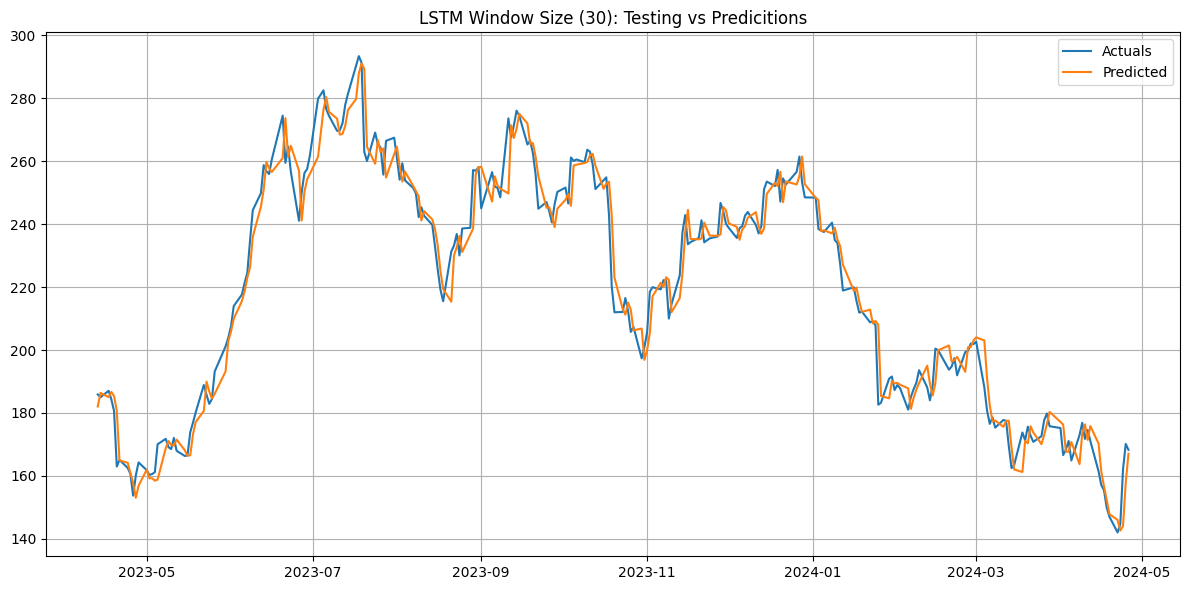

In [24]:
plt.figure(figsize=(12, 6))
#plt.plot(X_['Close'], label = 'Train')
plt.plot(test_results['Actuals'], label = 'Actuals')
plt.plot(test_results['Predicted'], label = 'Predicted')

plt.title('LSTM Window Size (30): Testing vs Predicitions')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

In [27]:
# X_future = pd.DataFrame({'Close-7':close_df['Close-6'][-1:], 'Close-6':close_df['Close-5'][-1:],'Close-5':close_df['Close-4'][-1:],'Close-4':close_df['Close-3'][-1:], 
#                    'Close-3':close_df['Close-2'][-1:], 'Close-2':close_df['Close-1'][-1:], 'Close-1':close_df['Close'][-1:]})

In [28]:
#X_future

In [25]:
X_future = pd.DataFrame()
column_name = 'Close'
close_df.drop(columns = 'Date', inplace = True)
for i in close_df.iloc[-1:].values:
    inverse_i = i[::-1][:-1]
    for j in range(29, -1, -1):
        new_column_name = f"{column_name}-{j+1}"
        X_future[new_column_name] = [inverse_i[j]]


In [26]:
X_future

,Close-30,Close-29,Close-28,Close-27,Close-26,Close-25,Close-24,Close-23,Close-22,Close-21,...,Close-10,Close-9,Close-8,Close-7,Close-6,Close-5,Close-4,Close-3,Close-2,Close-1
0,163.570007,173.800003,171.320007,175.660004,172.820007,170.830002,172.630005,177.669998,179.830002,175.789993,...,161.479996,157.110001,155.449997,149.929993,147.050003,142.050003,144.679993,162.130005,170.179993,168.289993


In [27]:
X_future_scaled = scaler_X.transform(X_future)

In [28]:
X_future_scaled

array([[0.38096468, 0.40666569, 0.40043515, 0.41133861, 0.40420363,
        0.3992041 , 0.40372628, 0.41638835, 0.42181497, 0.41166518,
        0.41023318, 0.38865237, 0.39304893, 0.39990755, 0.38430603,
        0.40460557, 0.41440364, 0.40154054, 0.40867555, 0.39975682,
        0.37571391, 0.36473509, 0.36056463, 0.34669662, 0.33946117,
        0.32689957, 0.33350694, 0.37734694, 0.39757107, 0.39282279]])

In [29]:
pred_future = model_load.predict(X_future_scaled)

1/1 [==============================] - 0s 79ms/step


In [30]:
pred_future_unscaled = scaler_y.inverse_transform(pred_future)

In [31]:
pred_future_unscaled

array([[168.24666]], dtype=float32)